# The Data

In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [6]:
df = pd.read_csv("data01.csv")
df.head()

,group,ID,outcome,age,gendera,BMI,hypertensive,atrialfibrillation,CHD with no MI,diabetes,...,Blood sodium,Blood calcium,Chloride,Anion gap,Magnesium ion,PH,Bicarbonate,Lactic acid,PCO2,EF
0,1,125047,0.0,72,1,37.588179,0,0,0,1,...,138.750000,7.463636,109.166667,13.166667,2.618182,7.230,21.166667,0.5,40.0,55
1,1,139812,0.0,75,2,NaN,0,0,0,0,...,138.888889,8.162500,98.444444,11.444444,1.887500,7.225,33.444444,0.5,78.0,55
2,1,109787,0.0,83,2,26.572634,0,0,0,0,...,140.714286,8.266667,105.857143,10.000000,2.157143,7.268,30.571429,0.5,71.5,35
3,1,130587,0.0,43,2,83.264629,0,0,0,0,...,138.500000,9.476923,92.071429,12.357143,1.942857,7.370,38.571429,0.6,75.0,55
4,1,138290,0.0,75,2,31.824842,1,0,0,0,...,136.666667,8.733333,104.500000,15.166667,1.650000,7.250,22.000000,0.6,50.0,55


In [7]:
df.shape

(1177, 51)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1177 entries, 0 to 1176
Data columns (total 51 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   group                     1177 non-null   int64  
 1   ID                        1177 non-null   int64  
 2   outcome                   1176 non-null   float64
 3   age                       1177 non-null   int64  
 4   gendera                   1177 non-null   int64  
 5   BMI                       962 non-null    float64
 6   hypertensive              1177 non-null   int64  
 7   atrialfibrillation        1177 non-null   int64  
 8   CHD with no MI            1177 non-null   int64  
 9   diabetes                  1177 non-null   int64  
 10  deficiencyanemias         1177 non-null   int64  
 11  depression                1177 non-null   int64  
 12  Hyperlipemia              1177 non-null   int64  
 13  Renal failure             1177 non-null   int64  
 14  COPD    

In [9]:
df.isnull().sum()

group                         0
ID                            0
outcome                       1
age                           0
gendera                       0
BMI                         215
hypertensive                  0
atrialfibrillation            0
CHD with no MI                0
diabetes                      0
deficiencyanemias             0
depression                    0
Hyperlipemia                  0
Renal failure                 0
COPD                          0
heart rate                   13
Systolic blood pressure      16
Diastolic blood pressure     16
Respiratory rate             13
temperature                  19
SP O2                        13
Urine output                 36
hematocrit                    0
RBC                           0
MCH                           0
MCHC                          0
MCV                           0
RDW                           0
Leucocyte                     0
Platelets                     0
Neutrophils                 144
Basophil

# Cleaning the Data

In [10]:
# We don't need the group and ID in our model
df.drop(['group','ID'],axis=1,inplace=True)

In [11]:
# droping duplicate value
df.drop_duplicates()

,outcome,age,gendera,BMI,hypertensive,atrialfibrillation,CHD with no MI,diabetes,deficiencyanemias,depression,...,Blood sodium,Blood calcium,Chloride,Anion gap,Magnesium ion,PH,Bicarbonate,Lactic acid,PCO2,EF
0,0.0,72,1,37.588179,0,0,0,1,1,0,...,138.750000,7.463636,109.166667,13.166667,2.618182,7.230,21.166667,0.5,40.0,55
1,0.0,75,2,NaN,0,0,0,0,1,0,...,138.888889,8.162500,98.444444,11.444444,1.887500,7.225,33.444444,0.5,78.0,55
2,0.0,83,2,26.572634,0,0,0,0,1,0,...,140.714286,8.266667,105.857143,10.000000,2.157143,7.268,30.571429,0.5,71.5,35
3,0.0,43,2,83.264629,0,0,0,0,0,0,...,138.500000,9.476923,92.071429,12.357143,1.942857,7.370,38.571429,0.6,75.0,55
4,0.0,75,2,31.824842,1,0,0,0,1,0,...,136.666667,8.733333,104.500000,15.166667,1.650000,7.250,22.000000,0.6,50.0,55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1172,0.0,62,1,25.516870,1,1,0,1,0,1,...,136.714286,10.271429,94.428571,20.142857,2.714286,NaN,27.714286,NaN,NaN,40
1173,0.0,78,1,25.822710,0,1,0,1,0,1,...,135.680000,10.523529,101.720000,18.160000,2.012500,NaN,20.480000,NaN,NaN,30
1174,0.0,85,2,23.891779,1,1,0,1,1,0,...,136.000000,8.466667,97.285714,14.000000,2.028571,NaN,28.857143,NaN,NaN,55
1175,0.0,79,2,35.288554,0,0,1,1,1,1,...,140.000000,8.183333,104.000000,15.750000,2.090000,NaN,24.375000,NaN,NaN,25


In [12]:
# droping columns with 1 unique value
for col in df.columns:
    if len(df[col].unique()) == 1:
        df.drop(col,inplace=True,axis=1)

We have 1 null value in our categorical data. we have remove it.

In [13]:
# cheking for unique value in outcome
df.outcome.unique()

array([ 0.,  1., nan])

In [14]:
# droping the null value from outcome variable
df = df.dropna(subset=['outcome'])

In [15]:
df.describe()

,outcome,age,gendera,BMI,hypertensive,atrialfibrillation,CHD with no MI,diabetes,deficiencyanemias,depression,...,Blood sodium,Blood calcium,Chloride,Anion gap,Magnesium ion,PH,Bicarbonate,Lactic acid,PCO2,EF
count,1176.000000,1176.000000,1176.000000,962.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,...,1176.000000,1175.000000,1176.000000,1176.000000,1176.000000,885.000000,1176.000000,948.000000,883.000000,1176.000000
mean,0.135204,74.047619,1.525510,30.188278,0.717687,0.451531,0.085884,0.420918,0.339286,0.119048,...,138.897009,8.501789,102.292048,13.923755,2.120286,7.378532,26.912116,1.853426,45.535382,48.710034
std,0.342087,13.437241,0.499561,9.325997,0.450316,0.497857,0.280312,0.493917,0.473668,0.323982,...,4.146172,0.571683,5.334562,2.653463,0.251608,0.067320,5.169696,0.983819,12.711271,12.872604
min,0.000000,19.000000,1.000000,13.346801,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,114.666667,6.700000,80.266667,6.636364,1.400000,7.090000,12.857143,0.500000,18.750000,15.000000
25%,0.000000,65.000000,1.000000,24.326461,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,136.666667,8.150000,99.000000,12.250000,1.955556,7.334615,23.452020,1.200000,37.038462,40.000000
50%,0.000000,77.000000,2.000000,28.312474,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,139.250000,8.500000,102.516667,13.666667,2.092582,7.380000,26.500000,1.600000,43.000000,55.000000
75%,0.000000,85.000000,2.000000,33.633509,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,...,141.600000,8.869375,105.571429,15.404167,2.241964,7.430000,29.881250,2.200000,50.585784,55.000000
max,1.000000,99.000000,2.000000,104.970366,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,154.736842,10.950000,122.526316,25.500000,4.072727,7.580000,47.666667,8.333333,98.600000,75.000000


In [16]:
# filling null with median
df = df.fillna(df.median())

In [17]:
# cheling for null value again
df.isnull().sum()

outcome                     0
age                         0
gendera                     0
BMI                         0
hypertensive                0
atrialfibrillation          0
CHD with no MI              0
diabetes                    0
deficiencyanemias           0
depression                  0
Hyperlipemia                0
Renal failure               0
COPD                        0
heart rate                  0
Systolic blood pressure     0
Diastolic blood pressure    0
Respiratory rate            0
temperature                 0
SP O2                       0
Urine output                0
hematocrit                  0
RBC                         0
MCH                         0
MCHC                        0
MCV                         0
RDW                         0
Leucocyte                   0
Platelets                   0
Neutrophils                 0
Basophils                   0
Lymphocyte                  0
PT                          0
INR                         0
NT-proBNP 

Now we can see here is no null value.

In [18]:
df.describe()

,outcome,age,gendera,BMI,hypertensive,atrialfibrillation,CHD with no MI,diabetes,deficiencyanemias,depression,...,Blood sodium,Blood calcium,Chloride,Anion gap,Magnesium ion,PH,Bicarbonate,Lactic acid,PCO2,EF
count,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,...,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000
mean,0.135204,74.047619,1.525510,29.846932,0.717687,0.451531,0.085884,0.420918,0.339286,0.119048,...,138.897009,8.501787,102.292048,13.923755,2.120286,7.378895,26.912116,1.804292,44.903693,48.710034
std,0.342087,13.437241,0.499561,8.465107,0.450316,0.497857,0.280312,0.493917,0.473668,0.323982,...,4.146172,0.571440,5.334562,2.653463,0.251608,0.058396,5.169696,0.888894,11.067475,12.872604
min,0.000000,19.000000,1.000000,13.346801,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,114.666667,6.700000,80.266667,6.636364,1.400000,7.090000,12.857143,0.500000,18.750000,15.000000
25%,0.000000,65.000000,1.000000,25.274510,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,136.666667,8.150000,99.000000,12.250000,1.955556,7.350000,23.452020,1.300000,39.000000,40.000000
50%,0.000000,77.000000,2.000000,28.312474,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,139.250000,8.500000,102.516667,13.666667,2.092582,7.380000,26.500000,1.600000,43.000000,55.000000
75%,0.000000,85.000000,2.000000,32.104250,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,...,141.600000,8.869063,105.571429,15.404167,2.241964,7.410000,29.881250,2.002273,47.275974,55.000000
max,1.000000,99.000000,2.000000,104.970366,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,154.736842,10.950000,122.526316,25.500000,4.072727,7.580000,47.666667,8.333333,98.600000,75.000000


## Feature Selection

r^2 on test data: 0.184916 


C:\Users\15513\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(


<AxesSubplot: title={'center': 'Modal Coefficient'}>

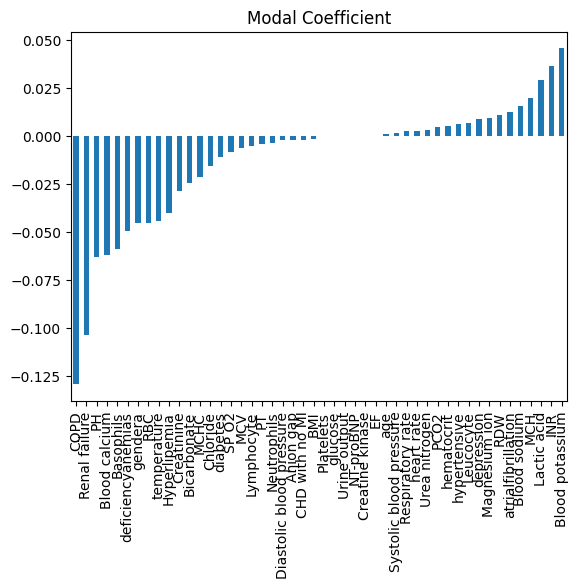

In [34]:

x=df.loc[:, df.columns != 'outcome'].values
y = df['outcome'].values


validation_size=0.20
seed=42

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=validation_size,random_state=seed)

from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score
alpha=1.0 #0.1
ridge =Ridge(alpha=alpha,normalize=False)


y_pred_ridge = ridge.fit(x_train,y_train).predict(x_test)
r2_score_ridge=r2_score(y_test,y_pred_ridge)
print("r^2 on test data: %f " % r2_score_ridge)
predictors=df.columns.values[1:]


coef=pd.Series(ridge.coef_,predictors).sort_values()
coef.plot(kind='bar',title='Modal Coefficient')

In [57]:
from sklearn.feature_selection import  SelectKBest,f_classif

x=df.loc[:, df.columns != 'outcome'].values
y = df['outcome'].values
z=df.iloc[:,0:48]

#suppose, we select 30 features with top 30 features score

selector=SelectKBest(f_classif,k=30)

X_new=selector.fit_transform(x,y)
names=z.columns.values[selector.get_support()]

 
scores=selector.scores_[selector.get_support()]
name_scores=list(zip(names,scores))
ns_df=pd.DataFrame(data=name_scores,columns=['Feat_names','F_scores'])

#sort the dataframe for better visualization
ns_df_sorted=ns_df.sort_values(['F_scores','Feat_names'],ascending=[False,True])
print(ns_df_sorted)


                  Feat_names   F_scores
25                  Chloride  65.378494
29               Bicarbonate  62.598534
28                        PH  61.234462
13                       RDW  53.234894
21                Creatinine  50.471080
24              Blood sodium  41.166600
11                     SP O2  35.147567
12                       MCV  26.323521
18                        PT  25.337488
27             Magnesium ion  24.030570
17                Lymphocyte  23.885841
22                   glucose  22.436188
6                 heart rate  20.845465
5                       COPD  19.990311
16                 Basophils  19.930608
19                       INR  17.465944
8   Diastolic blood pressure  16.229155
4               Hyperlipemia  13.985367
2               hypertensive  12.093420
3                   diabetes  11.742150
9           Respiratory rate  10.097273
14                 Leucocyte   9.260344
7    Systolic blood pressure   8.916203
26                 Anion gap   6.470068


[0.01636633 0.00294386 0.01635872 0.00303409 0.0033446  0.00064652
 0.00296456 0.00572582 0.00166686 0.00266335 0.00574382 0.00142502
 0.02435668 0.02331566 0.01756308 0.02646867 0.02831591 0.02637924
 0.03454485 0.02360726 0.02296891 0.01607054 0.01359199 0.02212249
 0.02133427 0.03502335 0.031074   0.02643374 0.01533047 0.04163654
 0.02413731 0.02513704 0.02472951 0.02198902 0.02366239 0.0323671
 0.0207987  0.02290896 0.02452508 0.03120445 0.02241717 0.05316044
 0.02149593 0.02616334 0.03835943 0.04275028 0.02188686 0.00928578]


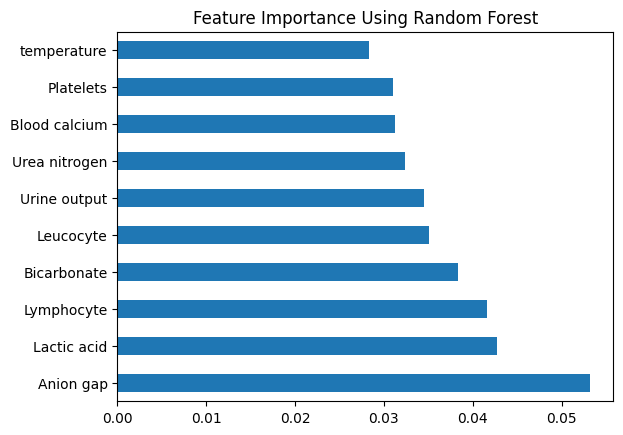

In [66]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

x=df.loc[:, df.columns != 'outcome']
y = df['outcome']

model = RandomForestClassifier()
model.fit(x,y)

print(model.feature_importances_) #use inbuilt class feature_importances of random based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.title("Feature Importance Using Random Forest")
plt.show()


Index(['outcome', 'age', 'gendera', 'BMI', 'hypertensive',
       'atrialfibrillation', 'CHD with no MI', 'diabetes', 'deficiencyanemias',
       'depression', 'Hyperlipemia', 'Renal failure', 'COPD', 'heart rate',
       'Systolic blood pressure', 'Diastolic blood pressure',
       'Respiratory rate', 'temperature', 'SP O2', 'Urine output',
       'hematocrit', 'RBC', 'MCH', 'MCHC', 'MCV', 'RDW', 'Leucocyte',
       'Platelets', 'Neutrophils', 'Basophils', 'Lymphocyte', 'PT', 'INR',
       'NT-proBNP', 'Creatine kinase', 'Creatinine', 'Urea nitrogen',
       'glucose', 'Blood potassium', 'Blood sodium', 'Blood calcium',
       'Chloride', 'Anion gap', 'Magnesium ion', 'PH', 'Bicarbonate',
       'Lactic acid', 'PCO2', 'EF'],
      dtype='object')


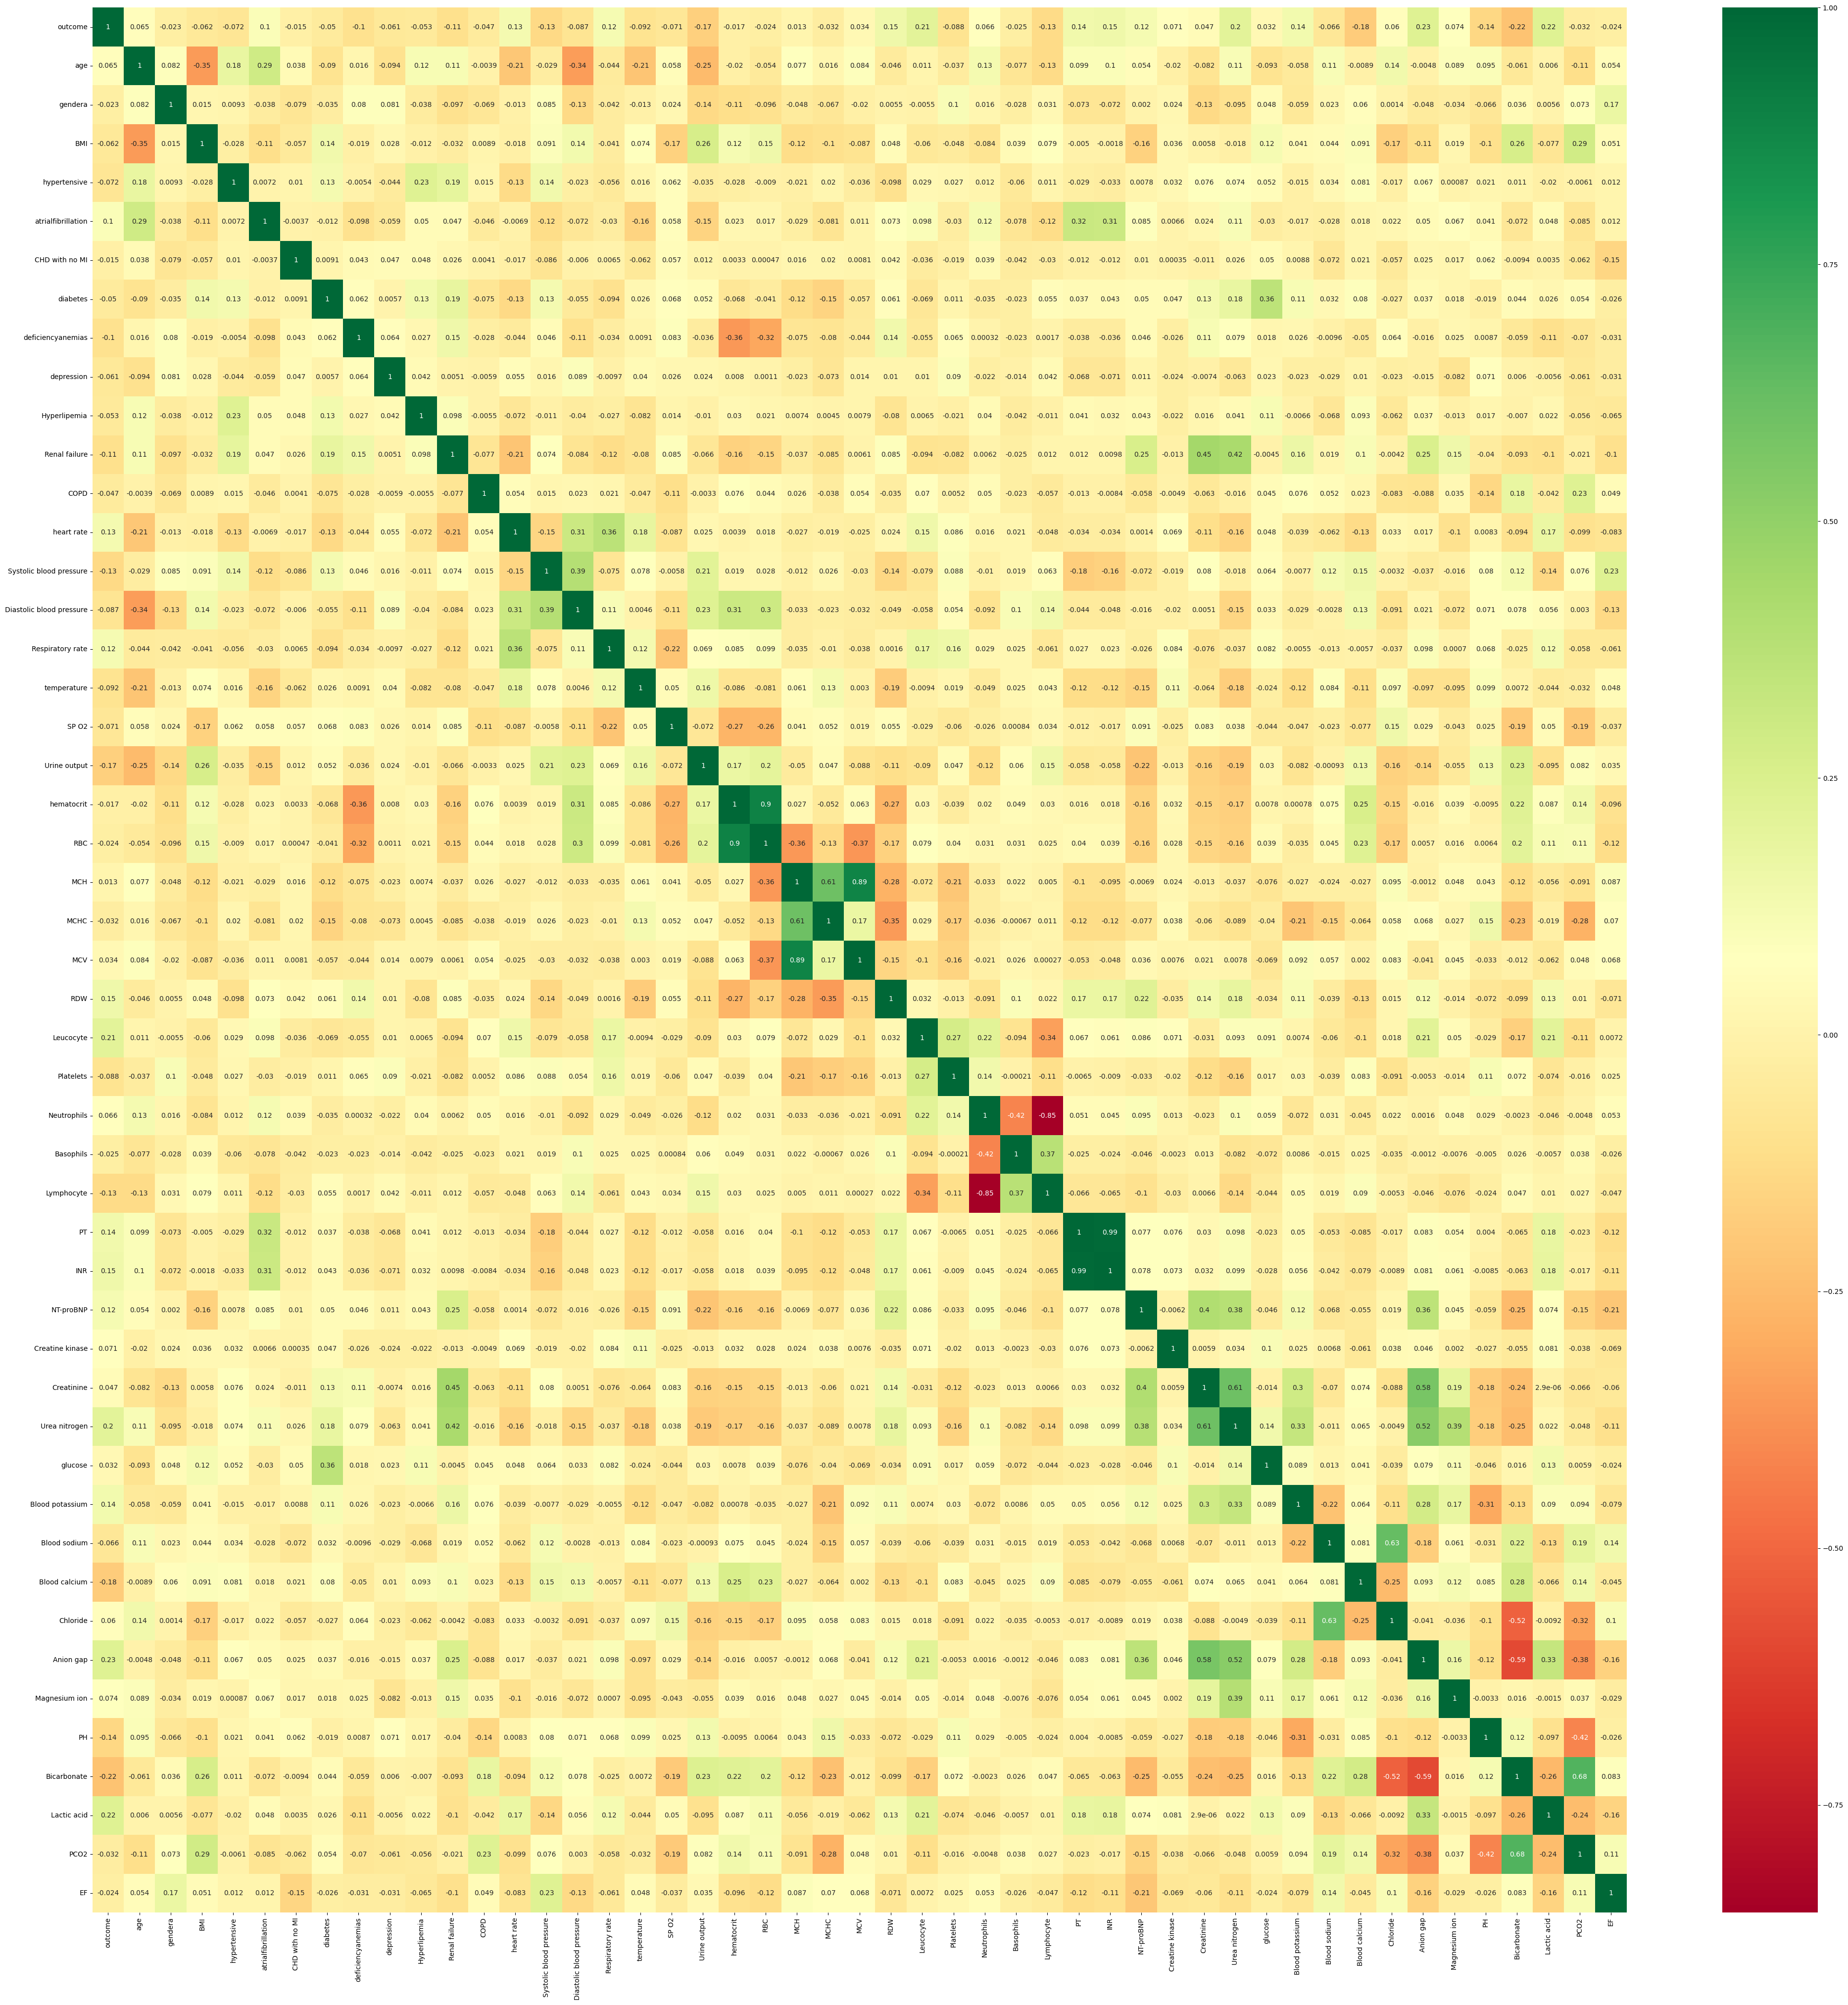

In [86]:
import pandas as pd
import numpy as np
import seaborn as sns

#get correlations of each features in dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(50,50))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")
print(top_corr_features)